### Importing the libraries

In [68]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical


### Set some options

In [37]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### Loading the dataset

In [89]:
df = pd.read_csv(r"C:\Users\Umar Attique\Downloads\archive (15)\fer2013.csv")

In [32]:
df.shape

(35887, 3)

In [7]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Number of unique values in data

In [8]:
df.nunique()

emotion        7
pixels     34034
Usage          3
dtype: int64

In [9]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [10]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [11]:
df['pixels'].unique()

array(['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 5

### Bar plot

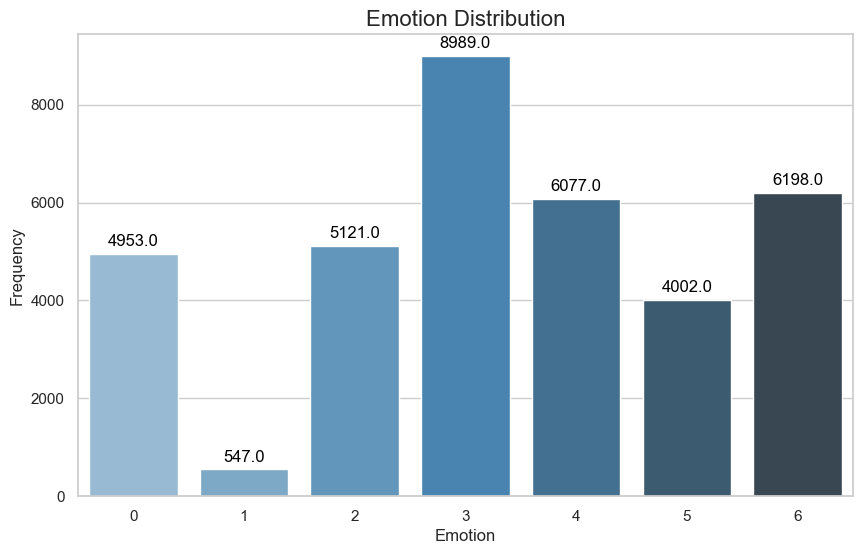

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label in the 'Usage' column
usage_counts = df['emotion'].value_counts()

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=usage_counts.index, y=usage_counts.values, palette='Blues_d')

# Adding title and labels
plt.title('Emotion Distribution', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the value on top of each bar for clarity
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()


## Pie chart

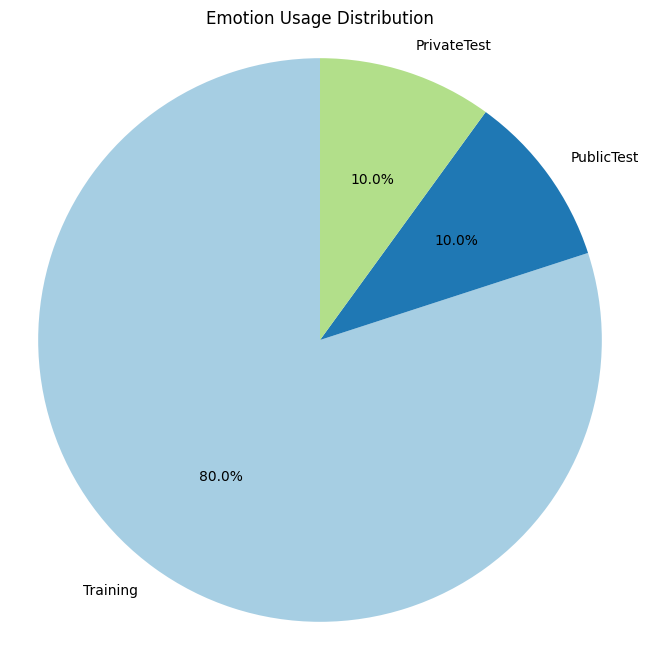

In [6]:
import matplotlib.pyplot as plt

# Count the occurrences of each label in the 'Usage' column
usage_counts = df['Usage'].value_counts()

# Plot the pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Title and aspect ratio to ensure the pie is circular
plt.title('Emotion Usage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


### Scatter plot

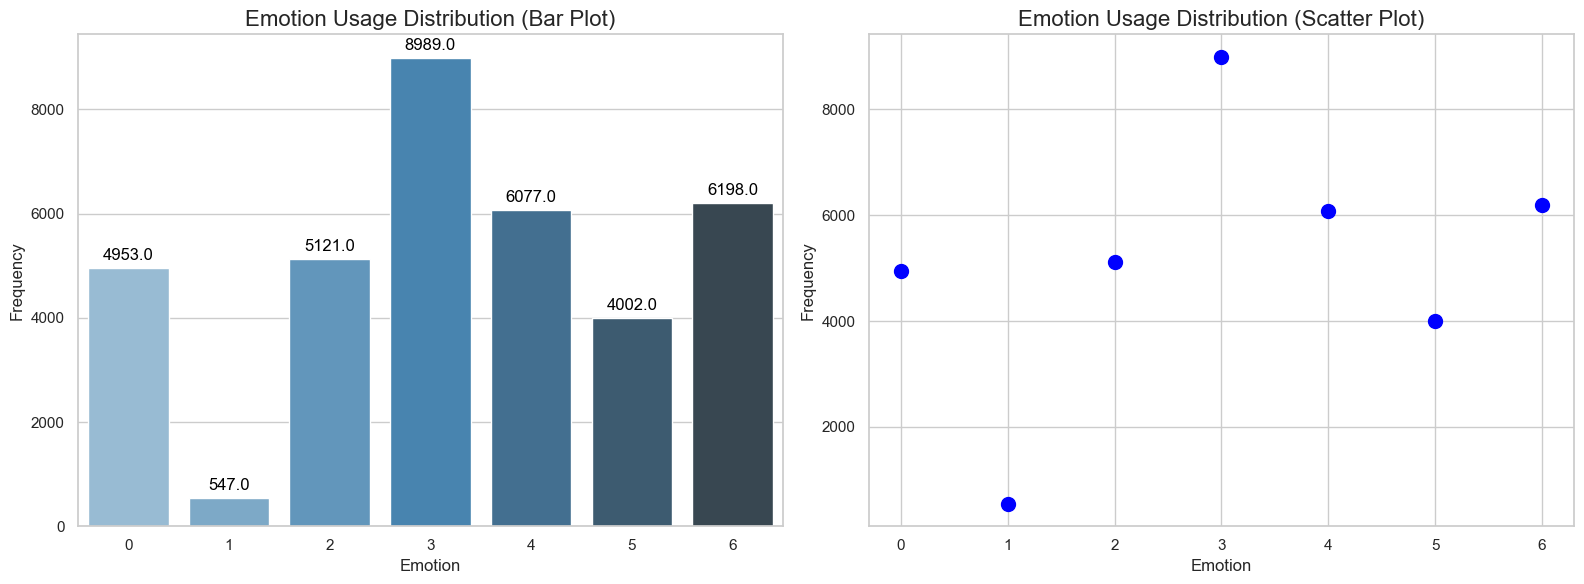

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label in the 'emotion' column
emotion_counts = df['emotion'].value_counts()

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a figure with two subplots: one for the bar plot and one for the scatter plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='Blues_d', ax=axes[0])
axes[0].set_title('Emotion Usage Distribution (Bar Plot)', fontsize=16)
axes[0].set_xlabel('Emotion', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Display the value on top of each bar for clarity
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 9), textcoords='offset points')

# Scatter plot
axes[1].scatter(emotion_counts.index, emotion_counts.values, color='blue', s=100)
axes[1].set_title('Emotion Usage Distribution (Scatter Plot)', fontsize=16)
axes[1].set_xlabel('Emotion', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

## Checking the info

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [45]:
df['pixels'].head()

0    [[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...
1    [[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...
2    [[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...
3    [[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...
4    [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: pixels, dtype: object

## Checking the null values 

In [15]:
df.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

### Splitting the data

In [92]:
import numpy as np

# Preprocess pixels assuming they are space-separated strings of pixel values
def preprocess_pixels(pixels):
    # Split the string by spaces and convert to a list of floats
    pixel_values = np.array(pixels.split(), dtype='float32')
    # Reshape the array to 48x48
    return pixel_values.reshape(48, 48)

# Apply preprocessing to all rows
df['pixels'] = df['pixels'].apply(preprocess_pixels)

# Split data into features and labels
X = np.stack(df['pixels'].values)  # Stack arrays into a 3D array
y = df['emotion']

# One-hot encode labels
y = to_categorical(y, num_classes=7)

# Reshape X for CNN input (add a channel dimension)
X = X.reshape(-1, 48, 48, 1)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now X_train, X_val, X_test, y_train, y_val, y_test are ready for training


## Plot some images

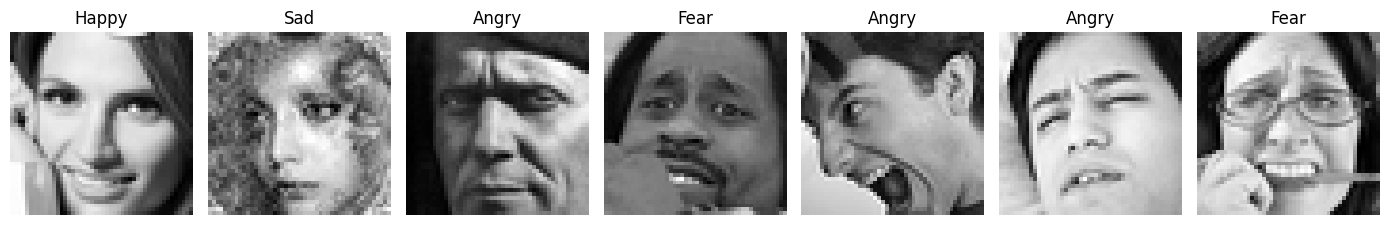

In [93]:
# Visualize a few images and their labels
fig, axes = plt.subplots(1, 7, figsize=(14, 4))
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(48, 48), cmap='gray')
    ax.set_title(emotion_labels[np.argmax(y_train[i])])
    ax.axis('off')
plt.tight_layout()
plt.show()


### Normalize the images

In [94]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


In [95]:
# Seeing the update shapes
print('X_train.shape : ',X_train.shape)
print('Y_train.shape : ',y_train.shape)
print('X_test.shape : ',X_test.shape)
print('Y_test.shape : ',y_test.shape)
print('X_val.shape : ',X_val.shape)
print('Y_val.shape : ',y_val.shape)

X_train.shape :  (25120, 48, 48, 1)
Y_train.shape :  (25120, 7)
X_test.shape :  (5384, 48, 48, 1)
Y_test.shape :  (5384, 7)
X_val.shape :  (5383, 48, 48, 1)
Y_val.shape :  (5383, 7)


### Applying the CNN

In [96]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [97]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.15),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.15),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.15),
    Dense(7, activation='softmax')  # 7 classes for emotion
])
# Compiling the model with a potentially better optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,975 (1.36 MB)

 Trainable params: 355,911 (1.36 MB)

 Non-trainable params: 64 (256.00 B)

In [98]:
# Adding EarlyStopping and Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2)

# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30, batch_size=64,
    callbacks=[early_stopping, lr_scheduler],
    shuffle=True
)


Epoch 1/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 81s 192ms/step - accuracy: 0.2955 - loss: 1.7619 - val_accuracy: 0.3964 - val_loss: 1.6512 - learning_rate: 0.0010
Epoch 2/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 73s 185ms/step - accuracy: 0.4458 - loss: 1.4485 - val_accuracy: 0.4332 - val_loss: 1.4656 - learning_rate: 0.0010
Epoch 3/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 75s 190ms/step - accuracy: 0.4837 - loss: 1.3346 - val_accuracy: 0.4967 - val_loss: 1.3278 - learning_rate: 0.0010
Epoch 4/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 74s 188ms/step - accuracy: 0.5154 - loss: 1.2598 - val_accuracy: 0.5172 - val_loss: 1.2749 - learning_rate: 0.0010
Epoch 5/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 77s 196ms/step - accuracy: 0.5439 - loss: 1.2008 - val_accuracy: 0.5185 - val_loss: 1.3133 - learning_rate: 0.0010
Epoch 6/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 74s 188ms/step - accuracy: 0.5578 - loss: 1.1629 - val_accuracy: 0.5463 - val_loss: 1.2236 - learning_rate: 0.0010
Epoch 7/30
393/393 ━━━━━━━━━━━━━━━━━━━━ 74s 189ms/step - accuracy: 0.5

## Visualization of metrices

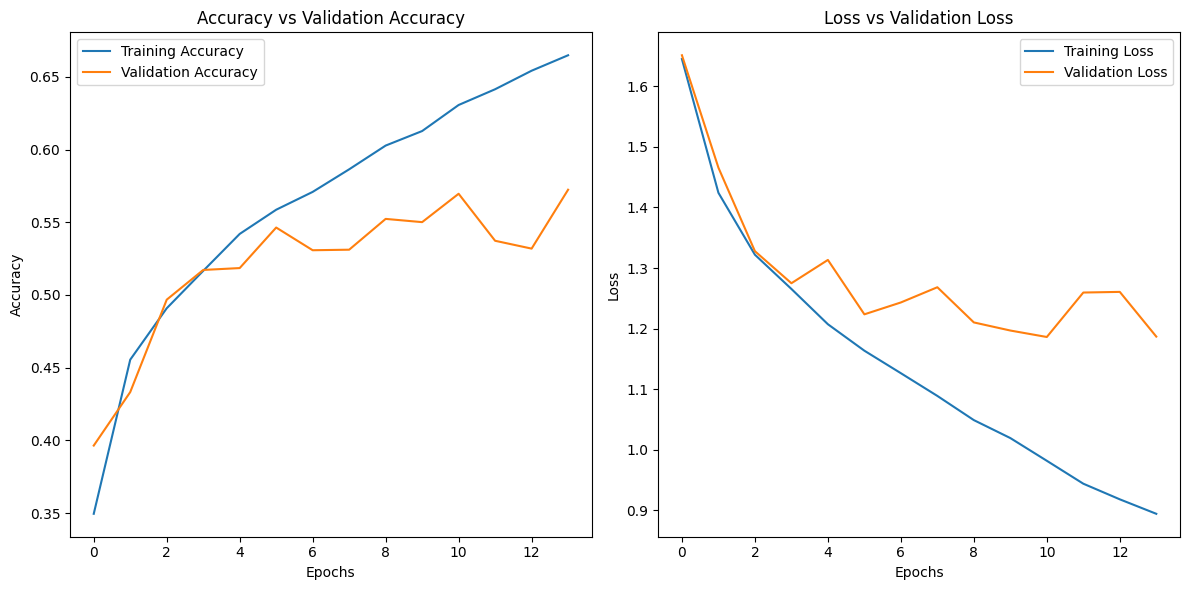

In [99]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Evaluate the model on test data

In [100]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5674 - loss: 1.1838
Test Accuracy: 57.30%
Test Loss: 1.1657


## Classification report

169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step


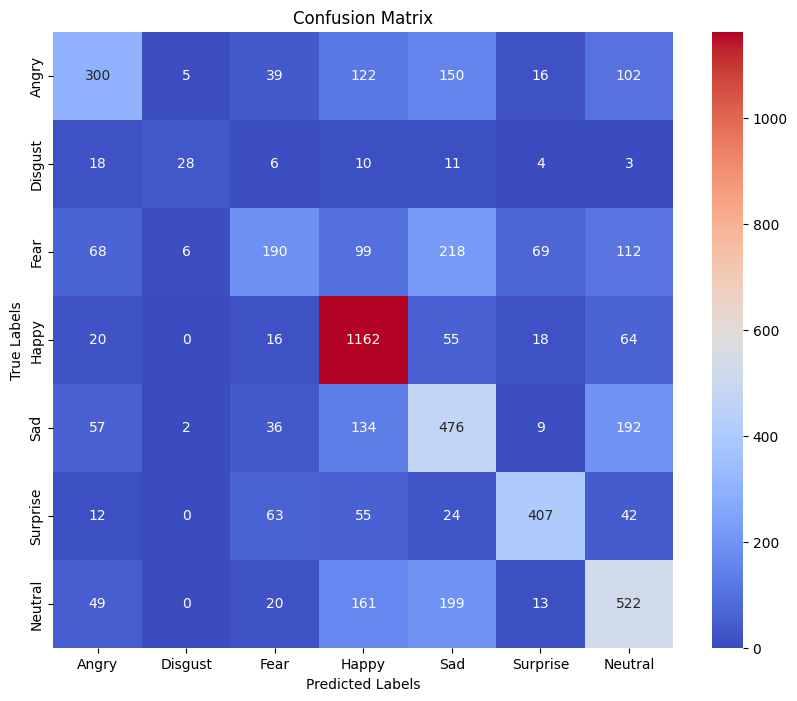

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Make predictions
y_pred = model.predict(X_test)

# Step 2: Decode one-hot encoded predictions and labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_test_classes = np.argmax(y_test, axis=1)  # True class indices

# Step 3: Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Step 4: Customize and display the heatmap
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
